In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import read_csv
from pandas import read_table
from pyannote.audio.train.trainer import Trainer
from scipy.signal import convolve, hamming, triang

/Users/bredin/Development/pyannote/pyannote-audio-private/pyannote/audio/train/trainer.py:178: RuntimeWarning: invalid value encountered in greater
  decreasing = 1 * (probability > 0.999)


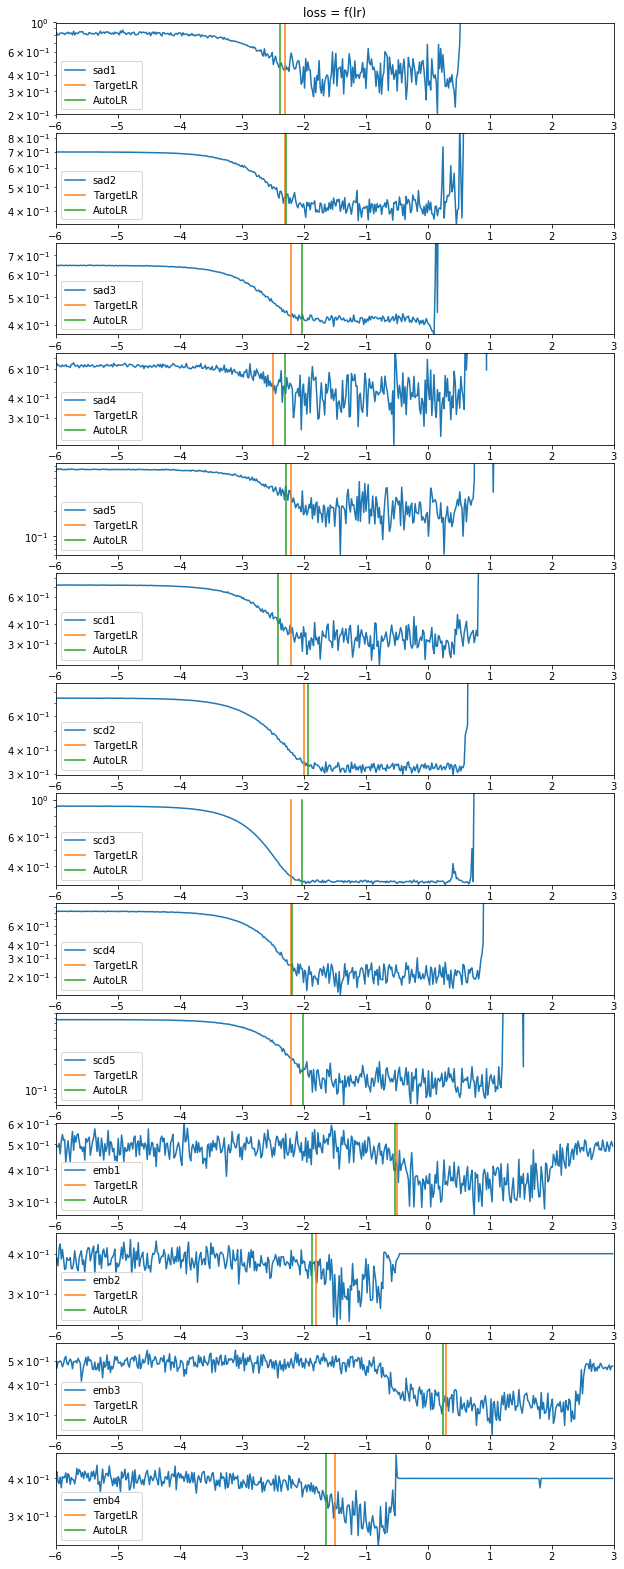

In [6]:

runs = read_table('examples/reference.txt', delim_whitespace=True, 
                  names=['run', 'max_lr'], index_col='run') 

figsize(10, 2 * len(runs))

for r, (run, reference) in enumerate(runs.iterrows()):
    result = read_table(f'examples/{run}.csv', delim_whitespace=True, names=['lr', 'loss'])
    lrs = np.array(result.lr)
    losses = np.array(result.loss)

    subplot(len(runs), 1, r+1)
    semilogy(lrs, losses, label=f'{run}')
    auto_lr = Trainer._choose_lr(10**lrs, losses)
    probability = auto_lr['probability']
    auto_lr = np.log10(auto_lr['max_lr'])

    target_lr = reference.max_lr

    if abs(auto_lr - target_lr) > 0.25:
        print(f'AutoLR failed for "{run}" (is: {auto_lr:.2f}, should be: {target_lr:.2f})')
    
    xlim(-6, 3);
    ylim(np.min(result.loss), np.median(result.loss[:50]) * 1.2);
    semilogy([reference.max_lr, reference.max_lr], 
             [np.min(losses), 1], label='TargetLR')
    semilogy([auto_lr, auto_lr], [np.min(losses), 1], label='AutoLR')
 
    legend(loc=3);
    
    if r == 0:
        title('loss = f(lr)')